In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
df = pd.read_csv("application_merged_final.csv")

In [3]:
# Pastikan kolom tidak kosong
df = df[df["OCCUPATION_TYPE"].notna()]

In [4]:
# Buat grup keterlambatan
df["LATE_GROUP"] = df["AVG_LATE_DAYS"].apply(lambda x: ">5 Hari" if x > 5 else "≤5 Hari")

In [5]:
# Grup berdasarkan pekerjaan dan grup keterlambatan
grouped = df.groupby(["OCCUPATION_TYPE", "LATE_GROUP"])["TARGET"].agg(['mean', 'count']).reset_index()
grouped = grouped.rename(columns={"mean": "Gagal_Bayar_Rate", "count": "Jumlah_Nasabah"})

In [6]:
# Filter jumlah nasabah yang cukup
grouped_filtered = grouped[grouped["Jumlah_Nasabah"] > 50]

In [7]:
# Urutkan berdasarkan risiko gagal bayar
grouped_sorted = grouped_filtered.sort_values(by="Gagal_Bayar_Rate", ascending=False)

In [8]:
# Tampilkan hasil
print("\n📊 Top Kombinasi Pekerjaan + Keterlambatan yang Berisiko:")
display(grouped_sorted.head(10))


📊 Top Kombinasi Pekerjaan + Keterlambatan yang Berisiko:


,OCCUPATION_TYPE,LATE_GROUP,Gagal_Bayar_Rate,Jumlah_Nasabah
18,Low-skill Laborers,>5 Hari,0.211765,85
19,Low-skill Laborers,≤5 Hari,0.169821,2008
32,Security staff,>5 Hari,0.164444,225
16,Laborers,>5 Hari,0.163812,1868
2,Cleaning staff,>5 Hari,0.151079,139
4,Cooking staff,>5 Hari,0.146119,219
28,Sales staff,>5 Hari,0.142281,991
8,Drivers,>5 Hari,0.132911,632
9,Drivers,≤5 Hari,0.112570,17971
22,Medicine staff,>5 Hari,0.110749,307


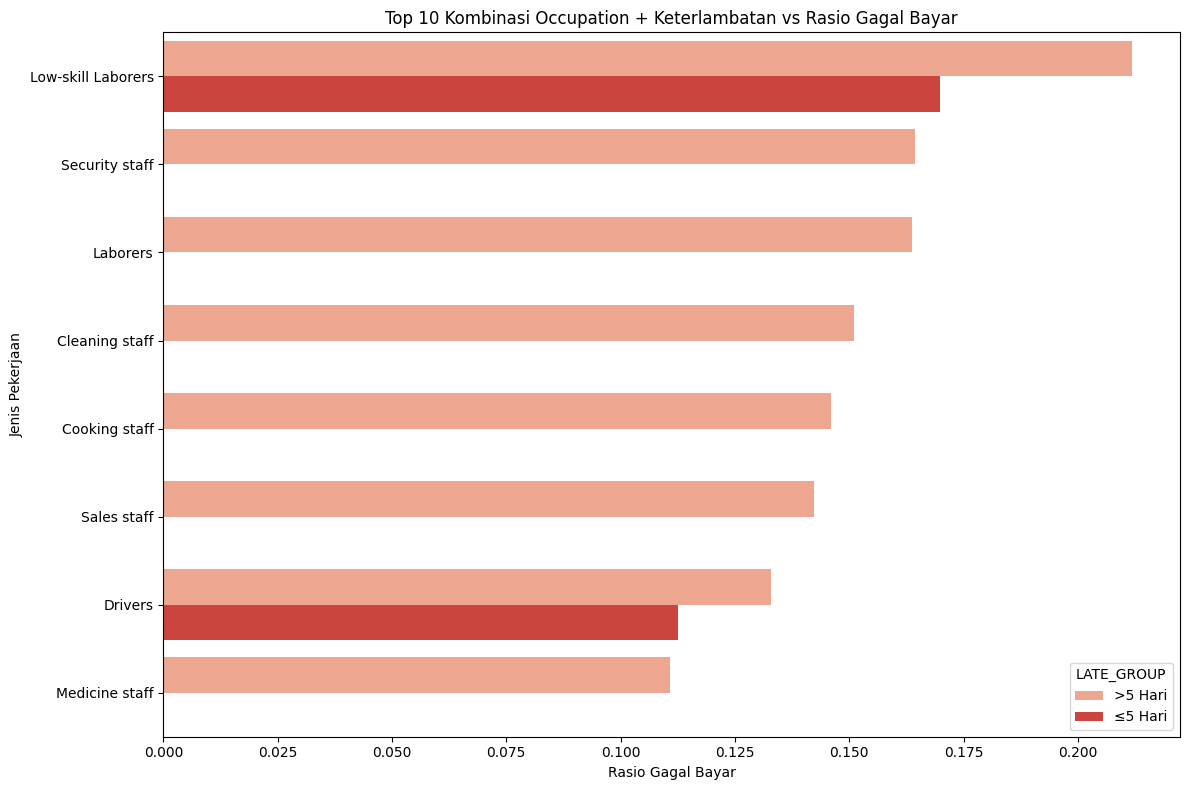

In [9]:
# Visualisasi kombinasi Occupation + keterlambatan
plt.figure(figsize=(12, 8))
sns.barplot(
    data=grouped_sorted.head(10),
    y="OCCUPATION_TYPE",
    x="Gagal_Bayar_Rate",
    hue="LATE_GROUP",
    palette="Reds"
)
plt.title("Top 10 Kombinasi Occupation + Keterlambatan vs Rasio Gagal Bayar")
plt.xlabel("Rasio Gagal Bayar")
plt.ylabel("Jenis Pekerjaan")
plt.tight_layout()
plt.show()

In [10]:
# Insight kedua: Risiko gagal bayar berdasarkan income type
income_risk = df.groupby("NAME_INCOME_TYPE")["TARGET"].agg(['mean', 'count']).sort_values(by='mean', ascending=False)
income_risk = income_risk.rename(columns={"mean": "Default_Rate", "count": "Jumlah_Nasabah"}).reset_index()

In [11]:
print("\n📌 Risiko Gagal Bayar berdasarkan Income Type:")
display(income_risk)


📌 Risiko Gagal Bayar berdasarkan Income Type:


,NAME_INCOME_TYPE,Default_Rate,Jumlah_Nasabah
0,Maternity leave,0.500000,4
1,Working,0.096867,133854
2,Commercial associate,0.076483,59320
3,State servant,0.058160,17916
4,Businessman,0.000000,8
5,Pensioner,0.000000,5
6,Student,0.000000,13


C:\Users\Agaam\AppData\Local\Temp\ipykernel_16836\341818511.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


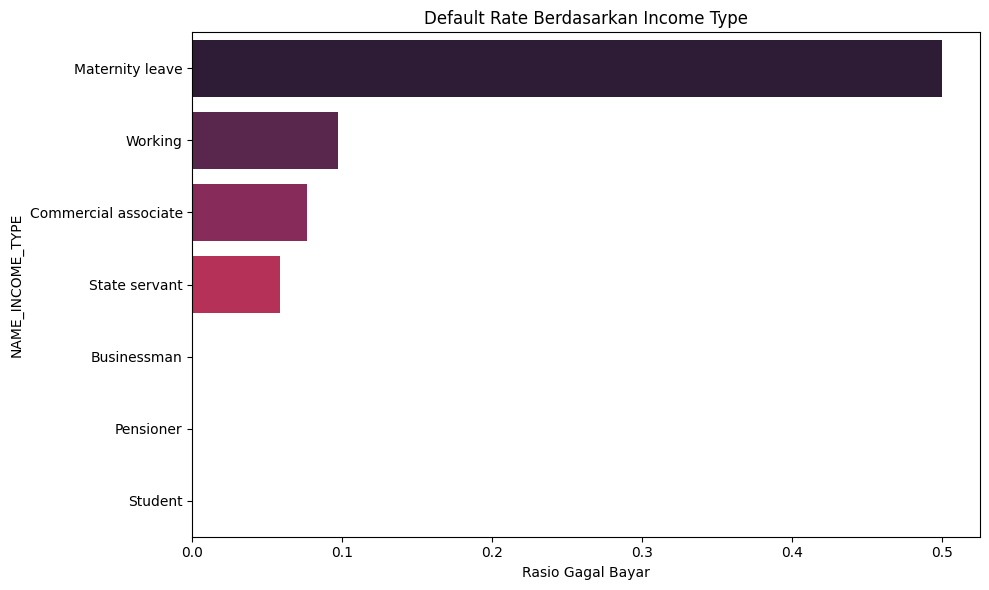

In [12]:
# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(
    data=income_risk,
    y="NAME_INCOME_TYPE",
    x="Default_Rate",
    palette="rocket",
    dodge=False
)
plt.xlabel("Rasio Gagal Bayar")
plt.title("Default Rate Berdasarkan Income Type")
plt.legend([], [], frameon=False)  # Hilangkan legenda
plt.tight_layout()
plt.show()